<a href="https://colab.research.google.com/github/SRC-07/EstructuraDeDatos_SANTIAGOROJASCARDENAS/blob/main/Taller_Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Santiago Rojas Cardenas ID: 927171 santiago.rojas-c@uniminuto.edu.co

Estructura de Datos NRC: 69131

Taller Arboles

Conjunto a:
Recorrido Inorden: [2, 3, 4, 6, 7, 9, 13, 15, 17, 18, 20]
Recorrido Preorden: [15, 6, 3, 2, 4, 7, 13, 9, 18, 17, 20]
Recorrido Postorden: [2, 4, 3, 9, 13, 7, 6, 17, 20, 18, 15]


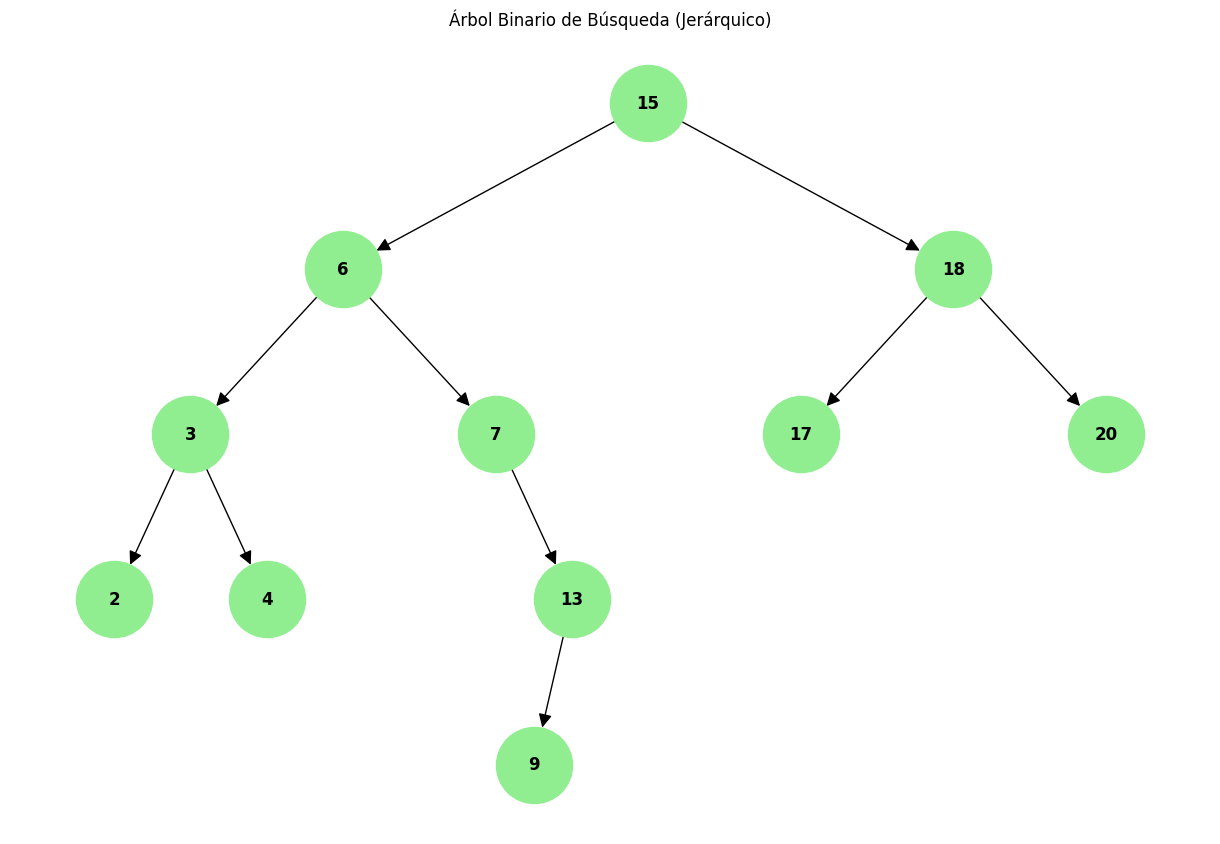

Conjunto b:
Recorrido Inorden: [4, 10, 12, 15, 18, 22, 24, 25, 31, 35, 44, 50, 66, 70, 90]
Recorrido Preorden: [25, 15, 10, 4, 12, 22, 18, 24, 50, 35, 31, 44, 70, 66, 90]
Recorrido Postorden: [4, 12, 10, 18, 24, 22, 15, 31, 44, 35, 66, 90, 70, 50, 25]


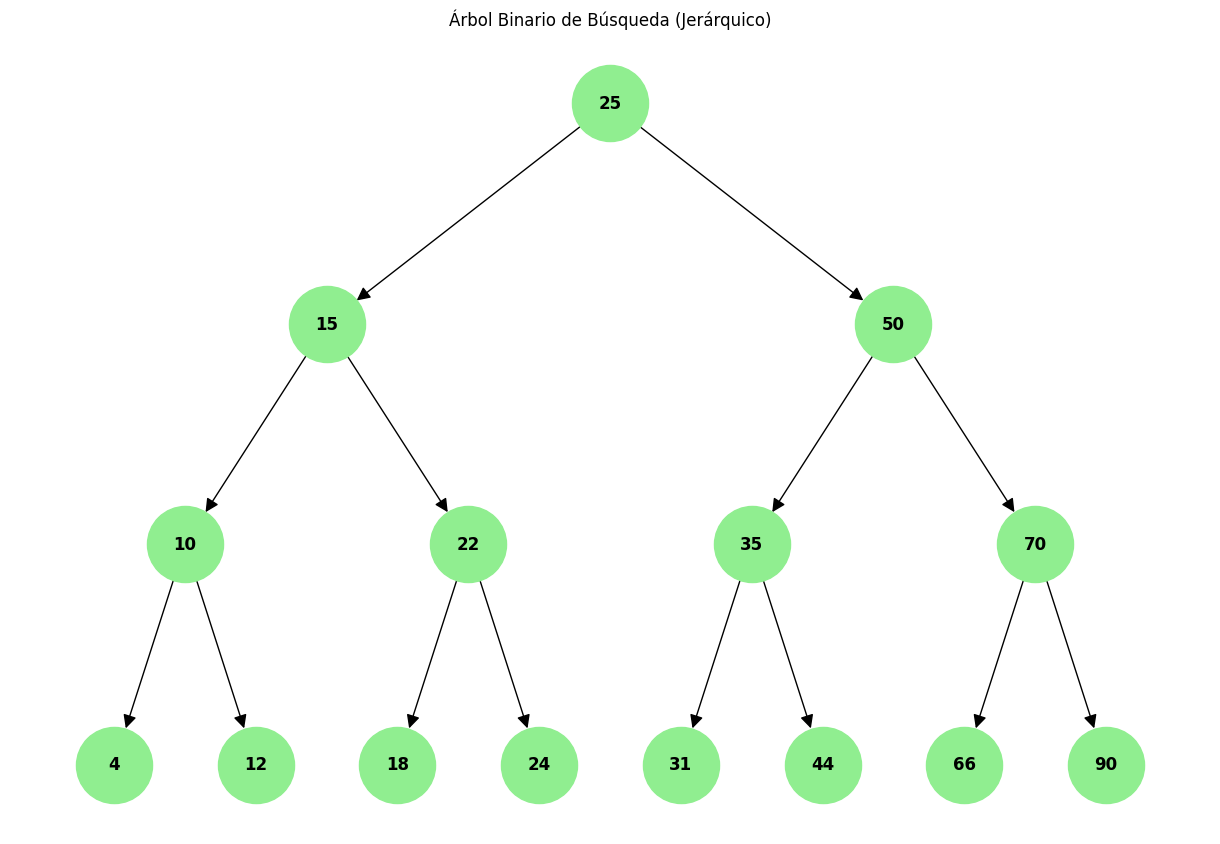

Conjunto c:
Recorrido Inorden: [10, 20, 25, 30, 35, 40, 50]
Recorrido Preorden: [30, 20, 10, 25, 40, 35, 50]
Recorrido Postorden: [10, 25, 20, 35, 50, 40, 30]


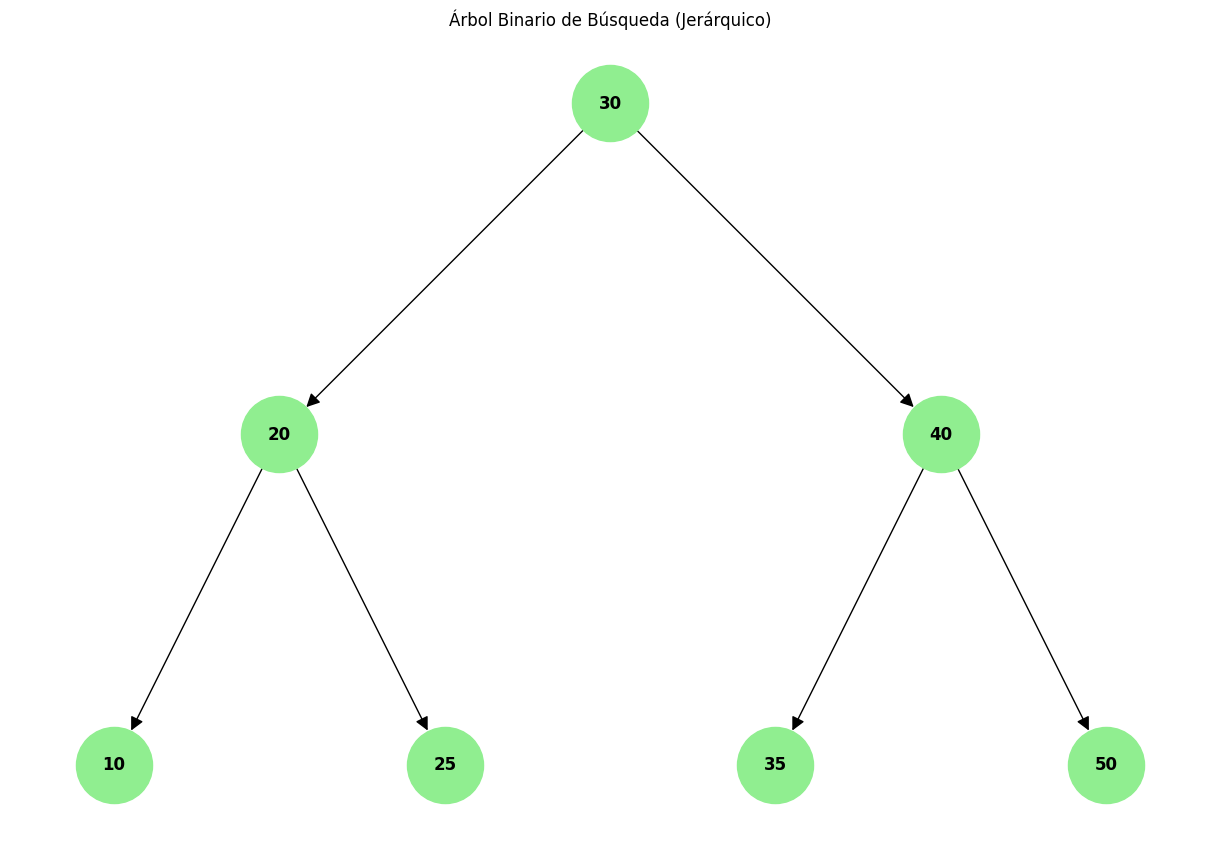

Conjunto d:
Recorrido Inorden: [9, 10, 12, 14, 18, 19, 20, 27, 30, 31, 33, 35, 38, 42, 45]
Recorrido Preorden: [27, 14, 10, 9, 12, 19, 18, 20, 35, 31, 30, 33, 42, 38, 45]
Recorrido Postorden: [9, 12, 10, 18, 20, 19, 14, 30, 33, 31, 38, 45, 42, 35, 27]


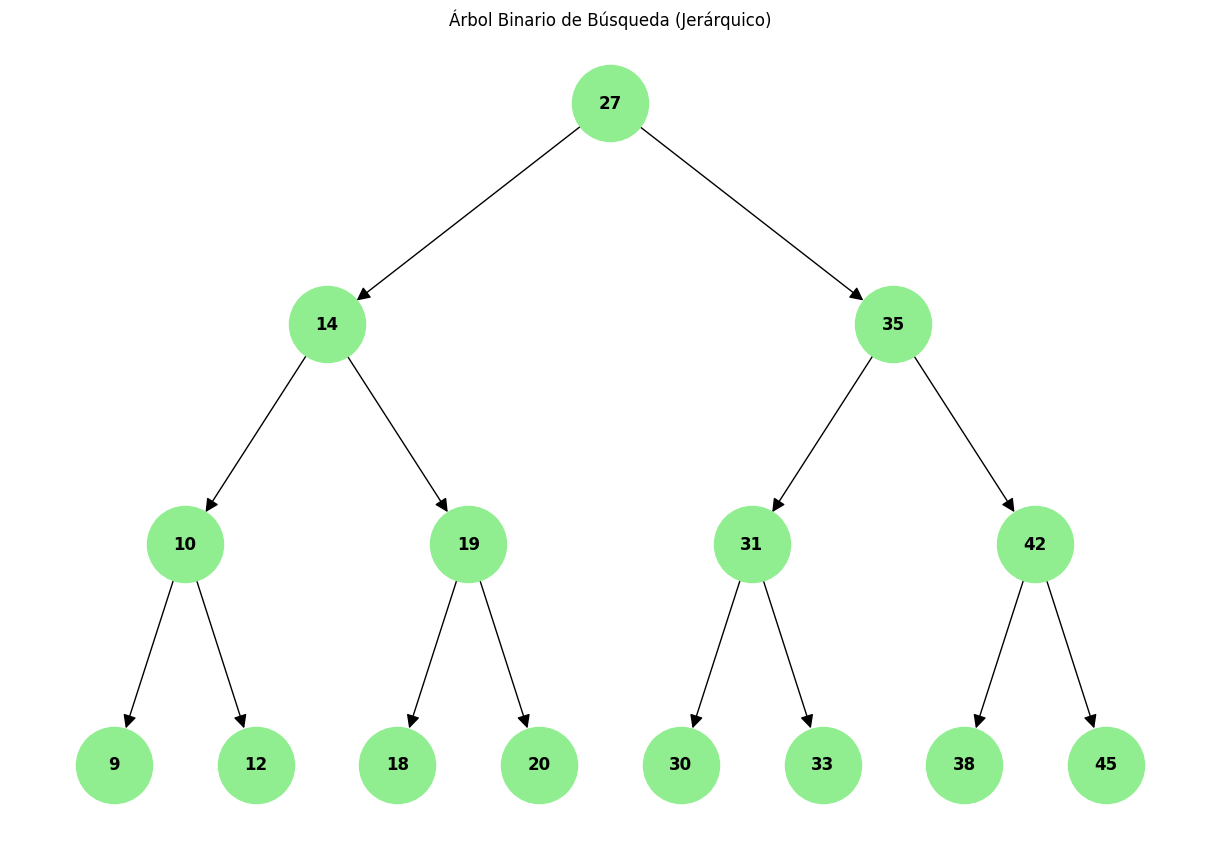

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Clase para representar un nodo en el árbol
class Nodo:
    def __init__(self, value):
        self.value = value
        self.izq = None
        self.der = None

# Función para insertar un nuevo valor en el árbol binario de búsqueda
def insert(root, value):
    if root is None:
        return Nodo(value)
    if value < root.value:
        root.izq = insert(root.izq, value)
    else:
        root.der = insert(root.der, value)
    return root

# Funciones para recorridos
def en_orden(nodo):
    return en_orden(nodo.izq) + [nodo.value] + en_orden(nodo.der) if nodo else []

def orden(nodo):
    return [nodo.value] + orden(nodo.izq) + orden(nodo.der) if nodo else []

def desp_orden(nodo):
    return desp_orden(nodo.izq) + desp_orden(nodo.der) + [nodo.value] if nodo else []

# Función para crear un grafo del árbol
def create_graph(nodo, graph=None):
    if graph is None:
        graph = nx.DiGraph()
    if nodo:
        if nodo.izq:
            graph.add_edge(nodo.value, nodo.izq.value)
            create_graph(nodo.izq, graph)
        if nodo.der:
            graph.add_edge(nodo.value, nodo.der.value)
            create_graph(nodo.der, graph)
    return graph

# Función para obtener posiciones jerárquicas
def hierarchical_pos(graph, nodo, x=0, y=0, layer_width=1):
    posicion = {nodo.value: (x, y)}
    if nodo.izq:
        posicion.update(hierarchical_pos(graph, nodo.izq, x - layer_width, y - 1, layer_width / 2))
    if nodo.der:
        posicion.update(hierarchical_pos(graph, nodo.der, x + layer_width, y - 1, layer_width / 2))
    return posicion

# Función para graficar el árbol
def arbol(root):
    G = create_graph(root)
    pos_hierarchical = hierarchical_pos(G, root)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos_hierarchical, with_labels=True, node_color='lightgreen', node_size=3000, font_size=12, font_weight='bold', arrowsize=20)
    plt.title("Árbol Binario de Búsqueda (Jerárquico)")
    plt.show()

# Datos de entrada
numeros = {
    'a': [15, 6, 18, 3, 7, 17, 20, 2, 4, 13, 9],
    'b': [25, 15, 50, 10, 22, 35, 70, 4, 12, 18, 24, 31, 44, 66, 90],
    'c': [30, 20, 40, 10, 25, 35, 50],
    'd': [27, 14, 35, 10, 19, 31, 42, 9, 12, 18, 20, 30, 33, 38, 45]
}

# Crear y graficar árboles para cada conjunto de datos
for key, values in numeros.items():
    root = None
    for value in values:
        root = insert(root, value)

    print(f"Conjunto {key}:")
    print("Recorrido Inorden:", en_orden(root))
    print("Recorrido Preorden:", orden(root))
    print("Recorrido Postorden:", desp_orden(root))

    arbol(root)